# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv")

## 1: Plot number of people by gender

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
df.gender.value_counts().values

array([2428,  107], dtype=int64)

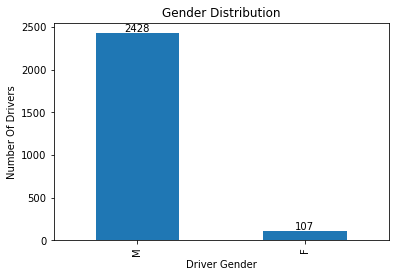

In [5]:
# with pandas
y = df.gender.value_counts().values
x = df.gender.value_counts().index

df.gender.value_counts().plot.bar(title="Gender Distribution");

plt.xlabel("Driver Gender");
plt.ylabel("Number Of Drivers");

for index, value in enumerate(y):
    plt.text(index, value, str(value), ha="center", va="bottom")

In [6]:
df.gender.value_counts(normalize=True).values

array([0.95779093, 0.04220907])

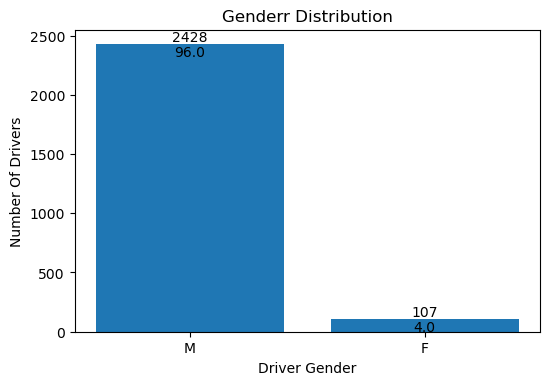

In [7]:
# with matplotlib
y = df.gender.value_counts().values
x = df.gender.value_counts().index
a = df.gender.value_counts(normalize=True).values

plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("Driver Gender");
plt.ylabel("Number Of Drivers");
plt.title("Genderr Distribution")


for index, value in enumerate(y):
    plt.text(index, value, str(value), ha="center", va="bottom")
    plt.text(index, value-10, str(round(a[index],2)*100), ha="center", va="top")

In [8]:
# with pandas

In [9]:
# with matplotlib


## 2: Plot 7 most common kill weapons

In [10]:
df.armed

0              gun
1              gun
2          unarmed
3       toy weapon
4         nail gun
           ...    
2530           gun
2531       vehicle
2532           gun
2533       vehicle
2534         knife
Name: armed, Length: 2535, dtype: object

In [11]:
df.armed.value_counts()[0:7]

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

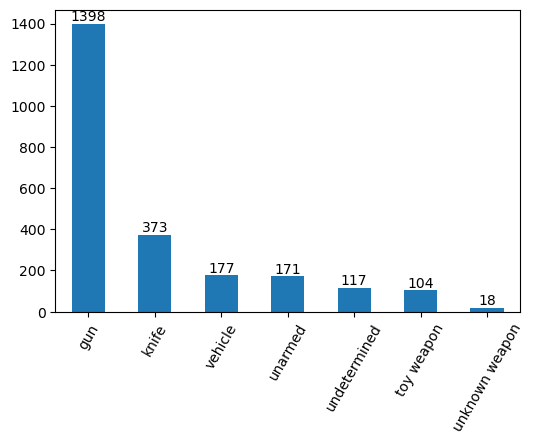

In [12]:
#with pandas

y = df.armed.value_counts()[:7].values
x = df.armed.value_counts()[:7].index

plt.figure(figsize=(6,4),dpi = 100)
df.armed.value_counts()[:7].plot.bar()
plt.xticks(rotation = 60);

for index, value in enumerate(y):
    plt.text(index,value,str(value), ha = "center", va = "bottom")

In [13]:
# with pandas


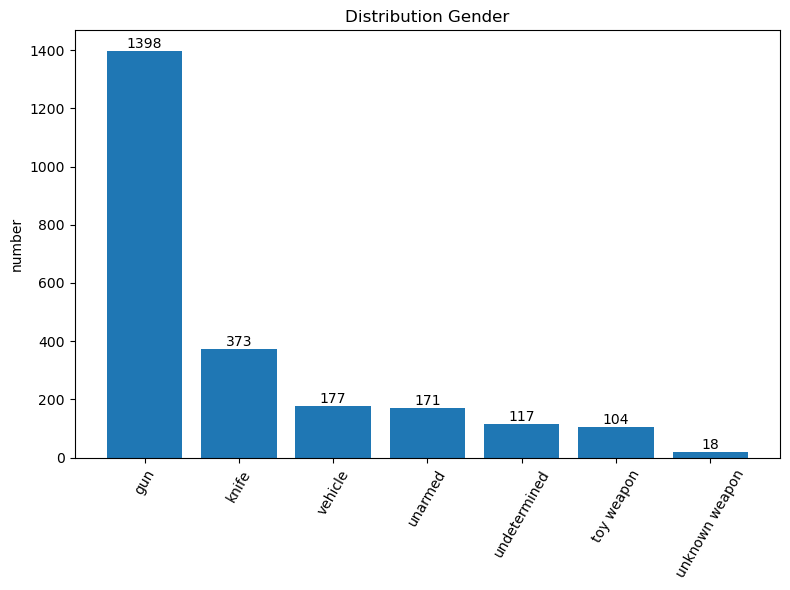

In [14]:
# with matplotlib

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

y = df.armed.value_counts()[:7].values
x = df.armed.value_counts()[:7].index


ax.set_ylabel('number')
ax.set_title('Distribution Gender')

ax.bar(x,y)
plt.xticks(rotation = 60)
fig.tight_layout()

for index, value in enumerate(y):
    plt.text(index,value, str(value), ha = "center", va= "bottom")

In [15]:
# with matplotlib


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [16]:
old = df.age.dropna() <= 25

In [17]:
old.isnull().sum()

0

In [18]:
old

0       False
1       False
2        True
3       False
4       False
        ...  
2529    False
2530    False
2532    False
2533    False
2534    False
Name: age, Length: 2458, dtype: bool

In [19]:
old = old.replace({True:"Below 25", False:"Above 25"})

In [20]:
old = pd.DataFrame(old)

In [21]:
old.value_counts()

age     
Above 25    1905
Below 25     553
dtype: int64

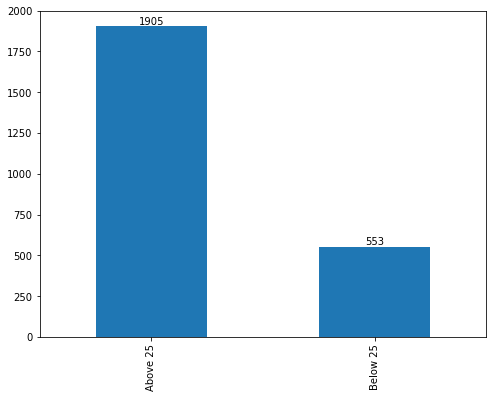

In [22]:
# with pandas

y = old.value_counts()
plt.figure(figsize=(8,6));

# old.value_counts().plot.bar();
old.age.value_counts().plot.bar();

for index, value in enumerate(y):
    plt.text(index,value,str(value), ha = 'center',va="bottom")

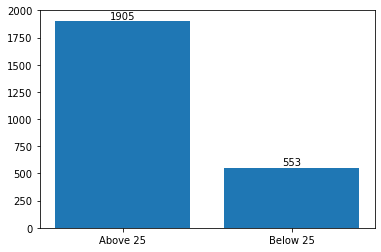

In [23]:
# with matplotlib

x = old.age.value_counts().index
y = old.age.value_counts().values

plt.bar(x,y);

for index, value in enumerate(y):
    plt.text(index,value,str(value), ha = 'center', va= "bottom")

In [24]:
# with pandas


In [25]:
# with matplotlib


## 4: Plot number of killed poeple by race

In [26]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [27]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

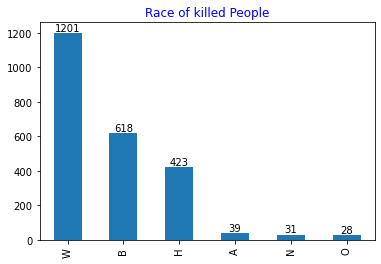

In [28]:
# with pandas

y = df.race.value_counts().values
df.race.value_counts().plot.bar();
plt.title("Race of killed People", color="blue")

for index, value in enumerate(y):
    plt.text(index,value,str(value), ha = 'center', va= "bottom")

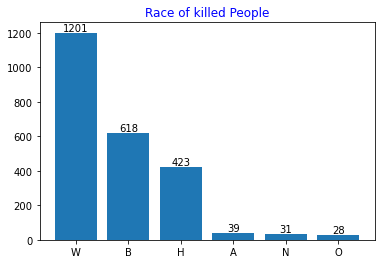

In [29]:
# with matplotlib

# y = df.race.value_counts().values

fig, ax = plt.subplots()
ax.bar(df.race.value_counts().index, df.race.value_counts().values)
ax.set_title("Race of killed People", color="blue")

for index, value in enumerate(y):
    plt.text(index,value,str(value), ha = 'center', va= "bottom")

In [30]:
# with pandas


In [31]:
# with matplotlib


## 5: Killed People According to Races (Pie Chart)

In [32]:
df.race.values

array(['A', 'W', 'H', ..., nan, 'B', 'B'], dtype=object)

In [33]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [34]:
df.dropna(inplace=True)

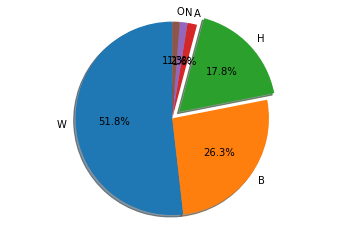

In [35]:
# matplotlib

labels = df.race.value_counts().index
sizes = df.race.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=[0,0,0.1,0,0,0], labels = labels, autopct="%.1f%%", shadow = True, startangle=90)
ax1.axis("equal")
plt.show()

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [36]:
# matplotlib



## 6: Most common 15 Name or Surname of killed people 

In [37]:
a = df.name[df.name != "TK TK"].str.split()

In [38]:
a

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2519            [Aries, Clark]
2523     [Kesharn, K., Burney]
2525       [Deltra, Henderson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2253, dtype: object

In [39]:
# j for i in a for j in i

In [40]:
b = [j for i in a for j in i]
b

['Tim',
 'Elliot',
 'Lewis',
 'Lee',
 'Lembke',
 'John',
 'Paul',
 'Quintero',
 'Matthew',
 'Hoffman',
 'Michael',
 'Rodriguez',
 'Kenneth',
 'Joe',
 'Brown',
 'Kenneth',
 'Arnold',
 'Buck',
 'Brock',
 'Nichols',
 'Autumn',
 'Steele',
 'Leslie',
 'Sapp',
 'III',
 'Patrick',
 'Wetter',
 'Ron',
 'Sneed',
 'Hashim',
 'Hanif',
 'Ibn',
 'Abdul-Rasheed',
 'Nicholas',
 'Ryan',
 'Brickman',
 'Omarr',
 'Julian',
 'Maximillian',
 'Jackson',
 'Loren',
 'Simpson',
 'James',
 'Dudley',
 'Barker',
 'Artago',
 'Damon',
 'Howard',
 'Thomas',
 'Hamby',
 'Jimmy',
 'Foreman',
 'Andy',
 'Martinez',
 'Tommy',
 'Smith',
 'Brian',
 'Barbosa',
 'Salvador',
 'Figueroa',
 'John',
 'Edward',
 "O'Keefe",
 'Richard',
 'McClendon',
 'Marcus',
 'Golden',
 'Michael',
 'Goebel',
 'Mario',
 'Jordan',
 'Talbot',
 'Schroeder',
 'Robert',
 'Edwards',
 'Jeffrey',
 'R.',
 'Nielson',
 'Donte',
 'Sowell',
 'Kavonda',
 'Earl',
 'Payton',
 'Quincy',
 'Reed',
 'Reindl',
 'Jose',
 'Ceja',
 'Nathan',
 'Massey',
 'Scott',
 'Hall',


In [41]:
c = {i:b.count(i) for i in set(b)}
c

{'Cramer': 1,
 'Kershaw': 1,
 'Rory': 1,
 'Vallarta': 1,
 "O'Neal": 1,
 'Carpentier': 1,
 'Mecklenburg': 1,
 'Charles': 23,
 'Marquis': 2,
 'Tolkinen': 1,
 'Pettit': 1,
 'Shipley': 1,
 'Quintonio': 1,
 'Walker': 3,
 'Cristian': 1,
 'Maximillian': 1,
 'Jake': 2,
 'Marquesha': 1,
 'Wimberly': 1,
 'Castilleja': 1,
 "O'Brien": 1,
 'Casimero': 1,
 'Cedric': 4,
 'Senegal': 1,
 'Jacai': 1,
 'Montoya': 1,
 'Westrich': 1,
 'Boulware': 1,
 'Buford': 1,
 'Christensen': 1,
 'Quinn': 4,
 'Phoenix': 1,
 'Rakeem': 1,
 'Steven': 13,
 'Yia': 1,
 'Kalyp': 1,
 'Schweikle': 1,
 'Buck': 3,
 'Hunt': 1,
 'Renato': 1,
 'Howard': 3,
 'Albert': 5,
 'Dickens': 1,
 'Byron': 1,
 'Megan': 1,
 'Hornibrook': 1,
 'Norris': 2,
 'Milanez': 1,
 'Burdge': 1,
 'Soriano': 1,
 'Erickson': 2,
 'Biggs': 2,
 'Nana': 1,
 'Flenaugh': 1,
 'Weaver': 1,
 'Mould': 1,
 'Hashim': 1,
 'Ollman': 1,
 'Alec': 1,
 'Unsworth': 1,
 'Livingston': 1,
 'Ponce-Galon': 1,
 'Morgan': 5,
 'Stortzum': 1,
 'Winesett': 1,
 'Rene': 4,
 'Payton': 1,
 'Do

In [42]:
common_names = pd.Series(c).sort_values(ascending=False)[:15]

In [43]:
common_names

Michael        82
David          53
James          47
Robert         44
Joseph         43
Daniel         40
William        40
Lee            37
John           36
Christopher    35
Richard        33
Smith          31
J.             30
Johnson        29
Joshua         27
dtype: int64

In [44]:
common_names = pd.DataFrame(common_names, columns=["frequency"])

In [45]:
common_names

,frequency
Michael,82
David,53
James,47
Robert,44
Joseph,43
Daniel,40
William,40
Lee,37
John,36
Christopher,35


In [46]:
common_names = common_names.reset_index()

In [47]:
common_names

,index,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


In [48]:
common_names.rename(columns={"index":"most_common_names_of_killed_people"}, inplace=True)

In [49]:
common_names

,most_common_names_of_killed_people,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,Daniel,40
6,William,40
7,Lee,37
8,John,36
9,Christopher,35


In [50]:
common_names.set_index("most_common_names_of_killed_people", inplace =True)

In [51]:
common_names.head(2)

,frequency
most_common_names_of_killed_people,
Michael,82
David,53


<Figure size 1800x900 with 0 Axes>

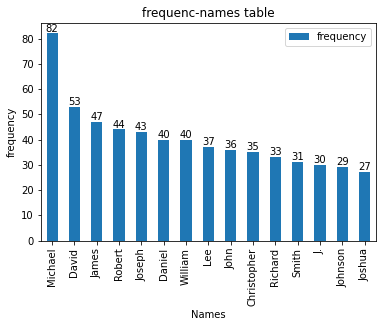

In [52]:
# with pandas

plt.figure(figsize=(12,6), dpi=150)
common_names.plot.bar();
# common_names.plot(kind="bar")
plt.xlabel("Names");
plt.ylabel("frequency");
plt.title("frequenc-names table");


for index, value in enumerate(common_names.frequency.values):
    plt.text(index,value,str(value), ha = 'center', va= "bottom");

In [55]:
common_names

,frequency
most_common_names_of_killed_people,
Michael,82
David,53
James,47
Robert,44
Joseph,43
Daniel,40
William,40
Lee,37
John,36


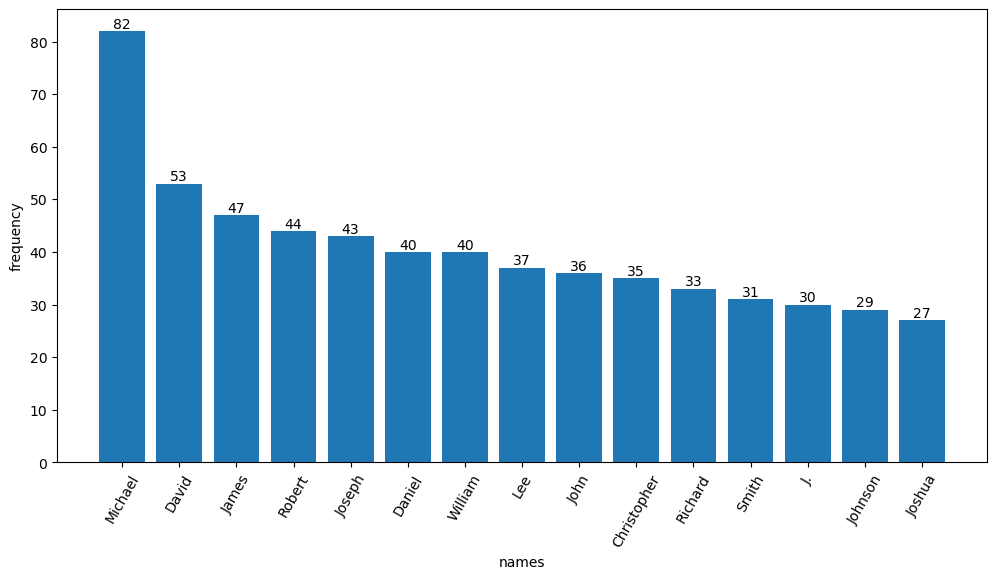

In [64]:
# with matplotlib

fig2, ax2 = plt.subplots(figsize=(12,6), dpi=100)
ax2.bar(common_names.index, common_names.frequency);
plt.xticks(rotation = 60);
ax2.set_xlabel("names");
plt.ylabel("frequency");
for index, value in enumerate(common_names.frequency):
    plt.text(index,value,str(value), ha = 'center', va= "bottom")

In [53]:
# Problem: TK TK is most probably not a name or surname. We will clean them.


In [54]:
type(pairs)

NameError: name 'pairs' is not defined

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

In [ ]:
# with pandas


In [ ]:
# with matplotlib
